# Predicting the Sales Price of Bulldozers udsing Machine Learning

Within the contents of this notebook, we'll dive into an illustrative machine learning venture. The essential objective of this venture is to create a prescient demonstrate able of precisely assessing the deal price of bulldozers. All through the note pad, we'll investigate different machine learning procedures and calculations to form a vigorous arrangement for this particular issue space.


## 1. Problem Definition

> How we can we pedict the future sale price of a bulldozer, given its characteristic and previous examples of how much similar bulldozers have been sold for?




## 2. Data


The data for this competition is split into three parts:

* `Train.csv` is the training set, which contains data through the end of 2011.
* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* `Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


The data is downloaded from Kaggle Bluebook for Bulldozers competition : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data



## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean square log error) between the actual and predicted auction prices.

For more on evaluation of this project check:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The primary objective when using regression evaluation metrics is typically to minimize the error. In our specific case, our goal is to build a predictive model that effectively minimizes the Root Mean Squared Logarithmic Error (RMSLE). By focusing on minimizing this error metric, we aim to create a model that accurately estimates the sale price of bulldozers.

## 4. Features

Kaggle has already provided us with a comprehensive data dictionary that describes the features used in our dataset. This data dictionary serves as a reference guide, providing detailed information about each feature and its corresponding meaning, allowing us to better understand the data we are working with.

You can refer this data dictionary from following spreadsheet link: https://docs.google.com/spreadsheets/d/1BNhaL5D3hBayRSXE4g1uQvdoGGiXFKr27nilsP7PA1s/edit?usp=sharing
 


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [106]:
# Import training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [108]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

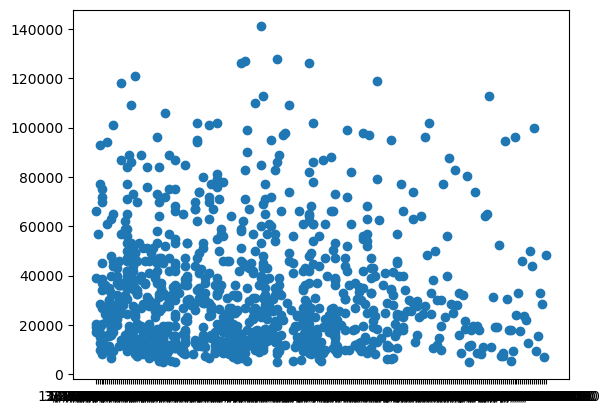

In [109]:
fig ,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

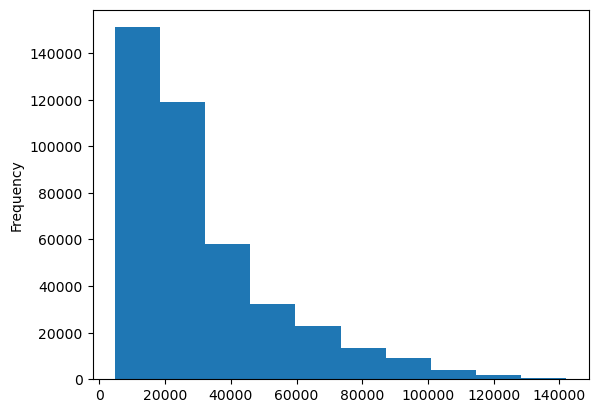

In [110]:
df.SalePrice.plot.hist()

### Parsing Dates 
When we work with time seires data, we want to enrich the itme and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it by using the `parse_dates` parmeters.

In [111]:
df.saledate.dtype

dtype('O')

In [112]:
# Import date again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [113]:
df.saledate.dtype

dtype('<M8[ns]')

In [114]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

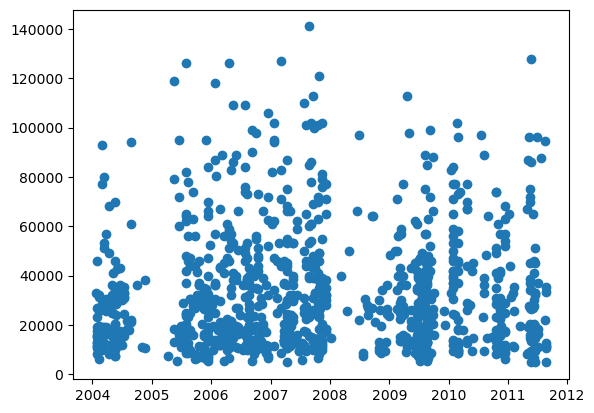

In [115]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000],)

In [116]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with the time seriesdata, it's a good idea to sort it by date.


In [118]:
# Sort DataFrame in date order
df.sort_values("saledate",inplace = True, ascending = True)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make a copy of your DataFrame

We make a copy of the original dataframe so when we manipulate the, we've still ghot our original data

In [119]:
df_tmp = df.copy()

In [120]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameter for `saledate` column


In [121]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [122]:
df_tmp["SaleYear"] = df_tmp.saledate.dt.year
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleDay"] = df_tmp.saledate.dt.day
df_tmp["SaleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.head(20).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,113394,116419,32138,127610,76171,127000,128130,127626,55455,55454
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,1449555,1453775,1264985,1475641,1364654,1474844,1476264,1475662,1305337,1305336
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,10500.0,20000.0,20000.0,23500.0,14000.0,11250.0,29000.0,22000.0,17000.0,17000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,1102310,1514650,1204499,1194367,1270628,1279993,1245504,1242833,1517075,1236263
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,3356,7008,6788,7277,7289,7257,7277,7277,3356,3356
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,1966,1974,1984,1973,1968,1979,1978,1973,1972,1972
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [123]:
# Since we've enriched our data by datetime now we can drop the saledate column
df_tmp.drop("saledate",axis = 1, inplace=True)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek,SaleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [35]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We've done enough EDA lets do modeldriven EDA

In [124]:
# Lets build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop("SalePrice",axis = 1),df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [125]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [126]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Turning Categotical Data into numbers

In [127]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [128]:
# Lets find all the column which are of sreing datatype
str_col = []
for col in df_tmp.columns:
    if(pd.api.types.is_string_dtype(df_tmp[col])):
        str_col.append(col)
len(str_col)

44

In [129]:
# Lets convert str datatype to categories
for label,content in df_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [130]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [131]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories now we have a way to access our data in the form of numbers.

But we still have a bunch of missing data...

In [132]:
# Check the missing data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Splitting our data into Train/Validation Sets

In [214]:
df_tmp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [215]:
# Split data into tranining and validation
df_train = df_tmp[df_tmp.SaleYear!=2012]
df_val = df_tmp[df_tmp.SaleYear==2012]
len(df_train), len(df_val)

(401125, 11573)

**Note :** Always fill your numerical values of validation and training set separately, filling together might hinder in our model
    but we can transform/encode our data together, but when its come to out numerical column always fill it after splitting out data

## Filling the missing values

### Fill numericals missing values first

In [216]:
# Checking the numerical columns 
for label,content in df_train.items():
    if(pd.api.types.is_numeric_dtype(content)):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [217]:
# Check for which columns there are null values
for label,content in df_train.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(content.isna().sum()):
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [218]:
# Check for which columns there are null values
for label,content in df_val.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(content.isna().sum()):
            print(label)

MachineHoursCurrentMeter


In [219]:
df_val['auctioneerIDis_missing'] = False

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/1434598467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['auctioneerIDis_missing'] = False


In [220]:
# Filling the missing numerical column value
for label,content in df_train.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(content.isna().sum()):
            df_train[label + "is_missing"] = pd.isnull(content)
            df_train[label] = content.fillna(content.median())

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/817256979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label + "is_missing"] = pd.isnull(content)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/817256979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.fillna(content.median())
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/817256979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [221]:
# Filling the missing numerical column value in validation set
for label,content in df_val.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(content.isna().sum()):
            df_val[label + "is_missing"] = pd.isnull(content)
            df_val[label] = content.fillna(content.median())

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/1376078530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label + "is_missing"] = pd.isnull(content)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/1376078530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = content.fillna(content.median())


In [222]:
df_train.isnull().sum(), df_val.isnull().sum()

(SalesID                                    0
 SalePrice                                  0
 MachineID                                  0
 ModelID                                    0
 datasource                                 0
 auctioneerID                               0
 YearMade                                   0
 MachineHoursCurrentMeter                   0
 UsageBand                             331486
 fiModelDesc                                0
 fiBaseModel                                0
 fiSecondaryDesc                       137191
 fiModelSeries                         344217
 fiModelDescriptor                     329206
 ProductSize                           210775
 fiProductClassDesc                         0
 state                                      0
 ProductGroup                               0
 ProductGroupDesc                           0
 Drive_System                          296764
 Enclosure                                325
 Forks                            

In [223]:
# again checkin if there is any null numeric column 
for label,content in df_train.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(content.isnull().sum()):
            print(label)

In [224]:
df_train['MachineHoursCurrentMeter'].value_counts(),df_val['MachineHoursCurrentMeter'].value_counts()

(0.0        331486
 2000.0        122
 1000.0        116
 1500.0        101
 500.0          97
             ...  
 6516.0          1
 13157.0         1
 13176.0         1
 7767.0          1
 13514.0         1
 Name: MachineHoursCurrentMeter, Length: 15152, dtype: int64,
 3786.0     6837
 0.0         708
 24.0         74
 48.0         43
 1553.0        5
            ... 
 6528.0        1
 8335.0        1
 1308.0        1
 11395.0       1
 13178.0       1
 Name: MachineHoursCurrentMeter, Length: 3075, dtype: int64)

We filled the missing values with median, since medians are more robust than mean

### Fill categorical missing values 

In [225]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [226]:
pd.Categorical(df_tmp['UsageBand']).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [227]:
pd.Categorical(df_tmp['state']).codes+ 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [228]:
# Checking for missing values in training set
for label,content in df_train.items():
    if(pd.api.types.is_categorical_dtype(content)):
        if(content.isnull().sum()):
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [229]:
# Checking for missing values in validation set
for label,content in df_val.items():
    if(pd.api.types.is_categorical_dtype(content)):
        if(content.isnull().sum()):
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [230]:
for label,content in df_train.items():
    if(pd.api.types.is_categorical_dtype(content)):
            df_train[label + "is_missing"] = pd.isnull(content)
            df_train[label] = pd.Categorical(content).codes + 1

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/243097056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label + "is_missing"] = pd.isnull(content)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/243097056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = pd.Categorical(content).codes + 1
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/243097056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [231]:
for label,content in df_val.items():
    if(pd.api.types.is_categorical_dtype(content)):
            df_val[label + "is_missing"] = pd.isnull(content)
            df_val[label] = pd.Categorical(content).codes + 1

/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/113930274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label + "is_missing"] = pd.isnull(content)
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/113930274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label] = pd.Categorical(content).codes + 1
/var/folders/x5/z5cwd1cx4wzdf6bwhq_b41x40000gn/T/ipykernel_15536/113930274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 78.8 MB


In [233]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 2.3 MB


In [234]:
df_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False
Blade_Typeis_missing,False,True,False,True,False
Travel_Controlsis_missing,False,True,False,True,False
Differential_Typeis_missing,True,False,True,False,True


Now since our all data is numeric and it doesnt have any missing value son ow we can build our machine learning model

In [235]:
%%time
# Instantiate our model
model = RandomForestRegressor(n_jobs=-1, random_state = 42)

# Fit the model
model.fit(df_train.drop('SalePrice', axis =1 ),df_train["SalePrice"])

CPU times: user 11min 31s, sys: 4.8 s, total: 11min 36s
Wall time: 1min 33s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [236]:
%%time
model.score(df_val.drop('SalePrice', axis =1 ),df_val["SalePrice"])

CPU times: user 688 ms, sys: 522 ms, total: 1.21 s
Wall time: 439 ms


0.8731666527561531

In [238]:
model.score(df_train.drop('SalePrice', axis =1 ),df_train["SalePrice"])

0.9875150955953674

Since we can see that one column is missing for our validation set because we had all value of that column therefore we willl create extra column and fil it wih false values

#### Splitting our data into X and y

In [247]:
# Splitting our data into X and y
X_train, y_train = df_train.drop("SalePrice",axis = 1),df_train["SalePrice"]
X_val, y_val = df_val.drop("SalePrice",axis = 1),df_val["SalePrice"]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

**Note :** Always fill your numerical values of validation and training set separately, filling together might hinder in our model
    but we can transform/encode our data together, but when its come to out numerical column always fill it after splitting out data

###  Building a Custom Evaluation function

In [258]:
# Create evauluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and
    true label
    """

    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# lets create function to evaluate model on few different levels
def show_scores(model):
    y_train_preds = model.predict(X_train)
    y_val_preds = model.predict(X_val)
    scores = {
        "Training MAE":mean_absolute_error(y_train,y_train_preds),
        "Validation MAE":mean_absolute_error(y_val,y_val_preds),
        "Training RMSLE":rmsle(y_train,y_train_preds),
        "Validaiton RMSLE":rmsle(y_val,y_val_preds),
        "Training r2":r2_score(y_train,y_train_preds),
        "Validation r2":r2_score(y_val,y_val_preds)
    }
    return scores

## Testing our model on a subset(to tune the hyperparameter)

In [248]:
%%time
# This takes far too long time

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(X_train,y_train)

CPU times: user 10min 56s, sys: 4.28 s, total: 11min
Wall time: 1min 29s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [259]:
print(show_scores(model))

{'Training MAE': 1578.2015208725463, 'Validation MAE': 6109.026518620927, 'Training RMSLE': 0.08426351714047395, 'Validaiton RMSLE': 0.2538621436522924, 'Training r2': 0.9875150955953674, 'Validation r2': 0.8731666527561531}


In [260]:
# Change max_samples value
model = RandomForestRegressor(n_jobs= -1,
                             random_state=42,
                             max_samples=10000)

In [264]:
(X_train.shape[0] * 100) / 1000000

4.01125

In [265]:
%%time
# Cutting down max number of samples each estiamtor can see improves training time
model.fit(X_train,y_train)

CPU times: user 22.6 s, sys: 512 ms, total: 23.2 s
Wall time: 3.69 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [266]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7192.496861660763,
 'Training RMSLE': 0.257745378256977,
 'Validaiton RMSLE': 0.2946335544842009,
 'Training r2': 0.8606658995199189,
 'Validation r2': 0.8318339261543847}

### Hyperparameter Tuning with RandmoisedSearchCV

In [272]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparamter
rf_grid = {
    'n_estimators': np.arange(10,100,10),
    'max_depth': [None, 3, 5, 10, 30],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2),
    'max_features': [0.5,1,'sqrt','auto'],
    'max_samples': [10000,50000]
}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=10,
                             cv = 5,
                            verbose= True)

# Fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/ujjwaltiwari/Desktop/TimeSeriesProject/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ujjwaltiwari/Desktop/TimeSeriesProject/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ujjwaltiwari/Desktop/TimeSeriesProject/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, 

CPU times: user 53.1 s, sys: 5.61 s, total: 58.7 s
Wall time: 2min 4s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10, 30],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, 50000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [273]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_samples': 50000,
 'max_features': 0.5,
 'max_depth': 30}

In [274]:
show_scores(rs_model)

{'Training MAE': 4843.194158222322,
 'Validation MAE': 6513.4736152430005,
 'Training RMSLE': 0.22690904916531887,
 'Validaiton RMSLE': 0.2651153319934035,
 'Training r2': 0.8911865144185634,
 'Validation r2': 0.8580934287352695}

### Train model with the best hyperparamters

**Note** : These were found after 100 iterations of `RandomizedSearchCV`


In [280]:
%%time 

# Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model 
ideal_model.fit(X_train, y_train)

CPU times: user 2min 7s, sys: 740 ms, total: 2min 7s
Wall time: 17.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [281]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Validation MAE': 5963.726791363277,
 'Training RMSLE': 0.14469006962371858,
 'Validaiton RMSLE': 0.2455528153606564,
 'Training r2': 0.9588145522577225,
 'Validation r2': 0.8811121058666912}

In [277]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_samples': 50000,
 'max_features': 0.5,
 'max_depth': 30}

In [279]:
%%time 

# Most ideal hyperparameters 
nonideal_model = RandomForestRegressor(n_estimators=60,
                                   min_samples_leaf=2,
                                   min_samples_split=5,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the model 
nonideal_model.fit(X_train, y_train)

CPU times: user 3min 11s, sys: 1.36 s, total: 3min 12s
Wall time: 26.7 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=60, n_jobs=-1, random_state=42)

In [282]:
show_scores(nonideal_model)

{'Training MAE': 2179.5198465648746,
 'Validation MAE': 5936.9177538715985,
 'Training RMSLE': 0.11342025395039283,
 'Validaiton RMSLE': 0.24483466233847212,
 'Training r2': 0.9754175127497688,
 'Validation r2': 0.8818999436789047}

In [286]:
# lets try another model i.e. SGDRegressor
from sklearn.linear_model import SGDRegressor

# Instantiating the model
sgd = SGDRegressor()

# fitting the model
sgd.fit(X_train,y_train)

SGDRegressor()

In [287]:
sgd.score(X_val,y_val)

-5.6547732654282645e+31

## Make predictions on our Test Data

In [290]:
# Import the test data
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                     low_memory=False,
                     parse_dates=["saledate"])
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [293]:
test_preds= nonideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...


In [294]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [295]:
df_test.describe()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,1.245700e+04,1.245700e+04,12457.000000,12457.000000,12457.000000,12457.000000,2.129000e+03
mean,5.787463e+06,1.776368e+06,9221.484788,146.680019,11.924380,1868.981055,1.984678e+04
std,1.470164e+06,7.589356e+05,7845.025382,14.158477,29.195676,338.095223,6.727711e+05
min,1.227829e+06,2.110000e+02,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,6.260703e+06,1.065286e+06,3380.000000,149.000000,1.000000,1994.000000,8.480000e+02
50%,6.300886e+06,1.904657e+06,4886.000000,149.000000,1.000000,2002.000000,3.525000e+03
75%,6.454946e+06,2.446075e+06,15474.000000,149.000000,3.000000,2005.000000,7.630000e+03
max,6.643196e+06,2.558557e+06,36941.000000,172.000000,99.000000,2014.000000,3.104628e+07


In [296]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

## Preprocessing the data (getting the test dataset in the same format of our training data set)

In [315]:
def preprocessing_data(df):
    """
    Performs transformation on df and returns transformed df
    """
    
    # Changing the date time datatype
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.dayofweek
    df["SaleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate",axis = 1, inplace = True)
    
   # Encoding the string data to numeric
    for label,content in df.items():
        if(pd.api.types.is_string_dtype(content)):
            df[label] = content.astype("category").cat.as_ordered()
    
    # Filling the numerical missing values
    if(df['auctioneerID'].isna().sum()==0):
        df['auctioneerIDis_missing'] = False
    for label,content in df.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if(content.isna().sum()):
                df[label + "is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    # Filling the categorical missing values
    for label,content in df.items():
        if(pd.api.types.is_categorical_dtype(content)):
            df[label + "is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
            
    return df

In [316]:
df_test_temp = df_test.copy()

In [317]:
df_test_temp = preprocessing_data(df_test_temp)

In [318]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [319]:
df_test_temp.isna().sum().sum()

0

In [320]:
test_preds = nonideal_model.predict(df_test_temp)
test_preds

array([16646.53679654, 15534.92866162, 46604.71891534, ...,
       12740.08928571, 15354.41137566, 28853.61111111])

In [322]:
test_preds_sir = ideal_model.predict(df_test_temp)
test_preds_sir

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [323]:
# To check the missing columns 
set(X_train.columns)- set(df_test.columns)

{'Backhoe_Mountingis_missing',
 'Blade_Extensionis_missing',
 'Blade_Typeis_missing',
 'Blade_Widthis_missing',
 'Coupler_Systemis_missing',
 'Coupleris_missing',
 'Differential_Typeis_missing',
 'Drive_Systemis_missing',
 'Enclosure_Typeis_missing',
 'Enclosureis_missing',
 'Engine_Horsepoweris_missing',
 'Forksis_missing',
 'Grouser_Tracksis_missing',
 'Grouser_Typeis_missing',
 'Hydraulics_Flowis_missing',
 'Hydraulicsis_missing',
 'MachineHoursCurrentMeteris_missing',
 'Pad_Typeis_missing',
 'Pattern_Changeris_missing',
 'ProductGroupDescis_missing',
 'ProductGroupis_missing',
 'ProductSizeis_missing',
 'Pushblockis_missing',
 'Ride_Controlis_missing',
 'Ripperis_missing',
 'SaleDay',
 'SaleDayOfWeek',
 'SaleDayOfYear',
 'SaleMonth',
 'SaleYear',
 'Scarifieris_missing',
 'Steering_Controlsis_missing',
 'Stick_Lengthis_missing',
 'Stickis_missing',
 'Thumbis_missing',
 'Tip_Controlis_missing',
 'Tire_Sizeis_missing',
 'Track_Typeis_missing',
 'Transmissionis_missing',
 'Travel_Contr

#### Format predictions into same as Kaggle asking for:


In [325]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test_temp["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,16646.536797
1,1227844,15534.928662
2,1227847,46604.718915
3,1227848,66504.391534
4,1227863,51933.529101
...,...,...
12452,6643171,43426.795635
12453,6643173,11538.931878
12454,6643184,12740.089286
12455,6643186,15354.411376


In [326]:
df_preds_sir = pd.DataFrame()
df_preds_sir["SalesID"] = df_test_temp["SalesID"]
df_preds_sir["SalesPrice"] = test_preds_sir
df_preds_sir

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [327]:
# Export to csv 
df_preds.to_csv("data/bluebook-for-bulldozers/test_predctions.csv")

In [329]:
df_preds_sir.to_csv("data/bluebook-for-bulldozers/test_predictions_sir.csv")

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variables(SalePrice)

In [331]:
# Find feature importance of our best model
len(ideal_model.feature_importances_), ideal_model.feature_importances_

(102,
 array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
        3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
        4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
        1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
        1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
        8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
        1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
        2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
        2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
        7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
        8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
        4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
        8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
        3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.

In [340]:
# Helper function for plotting feature importance
def plot_feature(columns,impotances,n=20):
    df = pd.DataFrame({'features':columns,
                      'feature_importances':impotances}).sort_values("feature_importances",ascending = False).reset_index(drop=True)
    
    # Plot the DataFrame
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    ax.invert_yaxis()

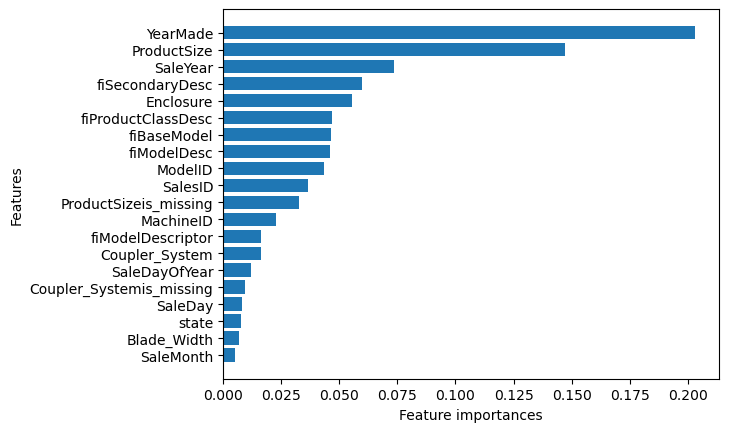

In [341]:
plot_feature(X_train.columns,nonideal_model.feature_importances_)

In [344]:
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [345]:
df["fiSecondaryDesc"].value_counts()

C         44431
B         40165
G         37915
H         24729
E         21532
          ...  
BLGPPS        1
MSR           1
LC7A          1
CL            1
BH            1
Name: fiSecondaryDesc, Length: 177, dtype: int64

**Question :** Why might knowing the feature importances of a trained machine learning model be helpful?
    
**Final Challenge :** What is the other machine learning models you can use to our data?
